# Entrenamiento estocástico y por bloques

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
session = tf.Session()

In [2]:
batch_size = 25

In [3]:
x_vals = np.random.normal(1.0, 0.1, 200)
y_vals = np.repeat(10.0, 200)

In [16]:
x_data = tf.placeholder(shape=[None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))

In [17]:
my_prediction = tf.matmul(x_data, A)

In [18]:
loss = tf.reduce_mean(tf.square(my_prediction-y_target))

In [19]:
my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.025)
train_step = my_optimizer.minimize(loss)

In [20]:
init = tf.global_variables_initializer()

In [21]:
session.run(init)

In [13]:
loss_batch = []
for i in range(200):
    rand_index = np.random.choice(200, size = batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    session.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    if (i+1)%5 == 0:
        print("Paso #"+str(i+1)+' A='+str(session.run(A)))
        temp_loss = session.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
        print("Loss: "+str(temp_loss))
        loss_batch.append(temp_loss)

Paso #5 A=[[1.5466158]]
Loss: 71.72997
Paso #10 A=[[3.4607847]]
Loss: 42.500683
Paso #15 A=[[4.9370623]]
Loss: 24.722448
Paso #20 A=[[6.0674796]]
Loss: 13.995347
Paso #25 A=[[6.942403]]
Loss: 8.976261
Paso #30 A=[[7.598681]]
Loss: 5.148073
Paso #35 A=[[8.106969]]
Loss: 3.3567538
Paso #40 A=[[8.51929]]
Loss: 2.806497
Paso #45 A=[[8.831427]]
Loss: 2.0926802
Paso #50 A=[[9.062699]]
Loss: 1.432271
Paso #55 A=[[9.237102]]
Loss: 1.735643
Paso #60 A=[[9.382525]]
Loss: 0.5055558
Paso #65 A=[[9.50833]]
Loss: 0.6689747
Paso #70 A=[[9.580933]]
Loss: 1.6290693
Paso #75 A=[[9.598646]]
Loss: 0.9758271
Paso #80 A=[[9.655508]]
Loss: 1.1856046
Paso #85 A=[[9.683915]]
Loss: 0.566765
Paso #90 A=[[9.745023]]
Loss: 0.8608786
Paso #95 A=[[9.779896]]
Loss: 0.8311683
Paso #100 A=[[9.768602]]
Loss: 0.92747325
Paso #105 A=[[9.791717]]
Loss: 0.78940964
Paso #110 A=[[9.818828]]
Loss: 0.91894895
Paso #115 A=[[9.815668]]
Loss: 0.57458705
Paso #120 A=[[9.794432]]
Loss: 1.1544502
Paso #125 A=[[9.8257475]]
Loss: 0.884

In [22]:
loss_stochastic = []
for i in range(200):
    rand_index = np.random.choice(200, size=1)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    session.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    if (i+1)%5 == 0:
        print("Paso #"+str(i+1)+' A='+str(session.run(A)))
        temp_loss = session.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
        print("Loss: "+str(temp_loss))
        loss_stochastic.append(temp_loss)

Paso #5 A=[[2.8386068]]
Loss: 47.227375
Paso #10 A=[[4.4447517]]
Loss: 35.52379
Paso #15 A=[[5.691227]]
Loss: 19.955452
Paso #20 A=[[6.6577764]]
Loss: 13.694222
Paso #25 A=[[7.337201]]
Loss: 4.6583633
Paso #30 A=[[7.8782945]]
Loss: 6.98701
Paso #35 A=[[8.31216]]
Loss: 3.61737
Paso #40 A=[[8.672001]]
Loss: 0.5675826
Paso #45 A=[[8.926746]]
Loss: 0.16416308
Paso #50 A=[[8.986436]]
Loss: 0.37651172
Paso #55 A=[[9.271205]]
Loss: 0.09251802
Paso #60 A=[[9.382527]]
Loss: 0.00820007
Paso #65 A=[[9.377138]]
Loss: 0.0030787715
Paso #70 A=[[9.321789]]
Loss: 2.4218476
Paso #75 A=[[9.33372]]
Loss: 0.40372807
Paso #80 A=[[9.482349]]
Loss: 1.1347523
Paso #85 A=[[9.697457]]
Loss: 0.014201307
Paso #90 A=[[9.695352]]
Loss: 0.09368313
Paso #95 A=[[9.715504]]
Loss: 0.44331262
Paso #100 A=[[9.683683]]
Loss: 0.8665652
Paso #105 A=[[9.506012]]
Loss: 3.8073099
Paso #110 A=[[9.626891]]
Loss: 1.4817065
Paso #115 A=[[9.750645]]
Loss: 0.27113193
Paso #120 A=[[9.827995]]
Loss: 2.5600774
Paso #125 A=[[9.819887]]
L

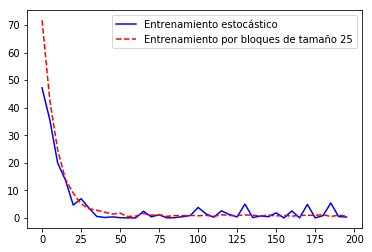

In [24]:
plt.plot(range(0,200,5), loss_stochastic, 'b-', label = "Entrenamiento estocástico")
plt.plot(range(0,200,5), loss_batch, 'r--', label = "Entrenamiento por bloques de tamaño 25")
plt.legend(loc="upper right", prop={'size':10})
plt.show()